<a href="https://colab.research.google.com/github/caohungphu/CS114.L21/blob/main/Colab/Sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21 - MÁY HỌC - MACHINE LEARNING</b></h1>
<h1 align="center"><b>BÀI TẬP COLAB SỐ 04 (31/05/2021)</b></h1>
 
## **1. YÊU CẦU:**

- 31/05/2021: Tìm dataset


## **2. NHÓM THỰC HIỆN**
- Cao Hưng Phú - 19520214 - 19520214@gm.uit.edu.vn
- Nguyễn Thành Công - 19521294 - 19521294@gm.uit.edu.vn
- Trần Huỳnh Kỳ Anh - 19521216 - 19521216@gm.uit.edu.vn

## **3. LINK GITHUB VÀ CÔNG CỤ**
- Link GitHub nhóm: https://github.com/caohungphu/CS114.L21/
- Link GitHub bài làm: [Sarcasm_detection.ipynb](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Sarcasm_detection.ipynb)
- Link GitHub code crawl dataset: [Crawler](https://github.com/caohungphu/CS114.L21/tree/main/Colab/CSV/Sarcasm_Detection/Crawler)
- Link GitHub dataset: [Sarcasm_detection.csv](https://github.com/caohungphu/CS114.L21/tree/main/Colab/CSV/Sarcasm_Detection/Sarcasm_Detection_Full.csv)
- Link đồng bộ dữ liệu của nhóm: [https://sv2.hungphu.tk/CS114/](https://sv2.hungphu.tk/CS114/)
- Link kiểm tra dữ liệu hiện tại: [https://sv2.hungphu.tk/CS114/data.php](https://sv2.hungphu.tk/CS114/data.php)


## **4. SOURCE CODE**

### **4.1. Nguồn tham khảo**

1. Thư viện pandas: https://pandas.pydata.org/docs/
2. Thông tin dữ liệu: https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection
3. Thư viện request: https://docs.python-requests.org/en/master/
4. Thư viện bs4: https://www.crummy.com/software/BeautifulSoup/bs4/doc/
5. Loại bỏ các kí tự bằng regex: https://stackoverflow.com/questions/6323296/python-remove-anything-that-is-not-a-letter-or-number
6. Thư viện plot: https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html
7. Machine Learning, NLP: Text Classification using scikit-learn, python and NLTK: https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
8. Choosing the right estimator: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
9. Working With Text Data: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

### **4.2. Code**

#### **4.2.1. Thu thập dữ liệu**

- Sau khi tham khảo thông tin dữ liệu ở trang Kaggle (Mục 4.1.2) nhóm tiến hành crawl dữ liệu thành 3 thuộc tính:
  + `headline` : Tiêu đề bài báo
  + `article_link` : Đường dẫn đến bài báo
  + `is_sarcastic` : Nhãn của bài báo (1 là bài báo châm biếm, 0 là bài báo bình thường)

##### **4.2.1.1 Tìm các trang web để crawl dữ liệu**
- Nhóm tiến hành đi tìm danh sách các trang báo châm biếm và không châm biếm và lưu lại các link để chia nhau ra crawl dữ liệu
- Link mà nhóm tìm được:

| #No | Link                             | Lable |
|-----|----------------------------------|-------|
| 1   | https://theonion.com             | 1     |
| 2   | https://huffpost.com             | 0     |
| 3   | https://newyorker.com            | 1     |
| 4   | https://thepoke.co.uk            | 1     |
| 5   | https://www.nytimes.com          | 0     |
| 6   | https://www.cracked.com          | 1     |
| 7   | https://clickhole.com            | 1     |
| 8   | https://thedailywtf.com          | 1     |
| 9   | https://www.euronews.com         | 0     |
| 10  | https://theguardian.com          | 0     |
| 11  | https://rochdaleherald.co.uk     | 1     |
| 12  | https://newsthump.com            | 1     |
| 13  | https://www.thedailymash.co.uk   | 1     |
| 14  | https://babylonbee.com/          | 1     |
| 15  | https://burrardstreetjournal.com | 1     |


##### **4.2.1.2 Crawl mẫu một trang web để làm mẫu cho các trang web sau**
- Nhóm tiến hành crawl mẫu site: https://theonion.com để làm mẫu cho các trang web khác
- Sau khi truy cập và quan sát trang web, nhóm nhận thấy có thể crawl nhiều dữ liệu từ link https://www.theonion.com/latest

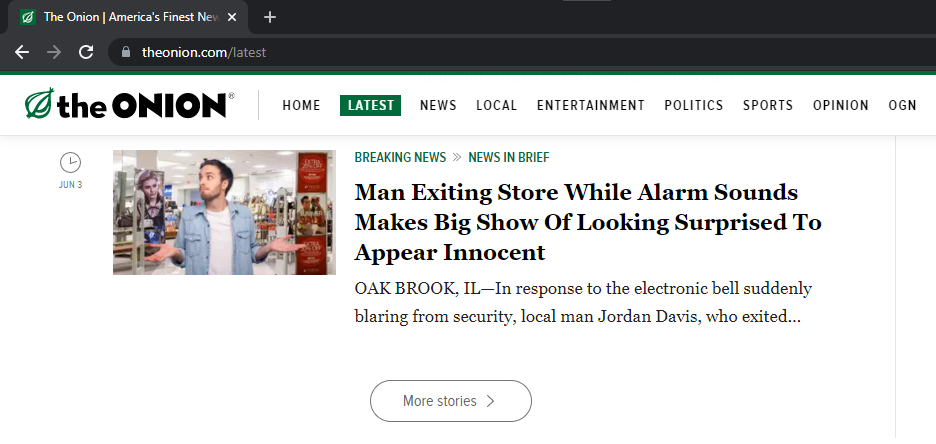

- Ở link https://www.theonion.com/latest nhóm thấy có nút "More stories"
- Sau khi click vào nút nhóm nhận thấy tham số truyền vào cho link có dạng: https://www.theonion.com/latest?startTime=1622727300318 và web sẽ cập nhật những bài viết cũ từ timeStamp với giá trị startTime=1622727300318
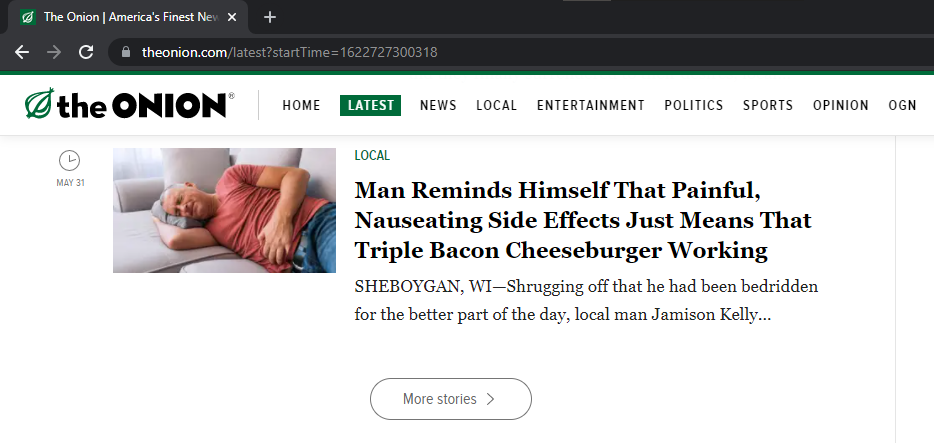


- Nhóm tiến hành kiểm tra các thẻ trên web để tiến hành thu thập dữ liệu gốm headline và link của bài viết
- Tiêu đề và đường dẫn của các bài viết nằm trong thẻ `<div>` và có `class = cw4lnv-5 aoiLP`:
 + Tiêu đề trong thẻ `<h2>`
 + Đường dẫn trong thuộc tính `href` của thẻ `<a>`

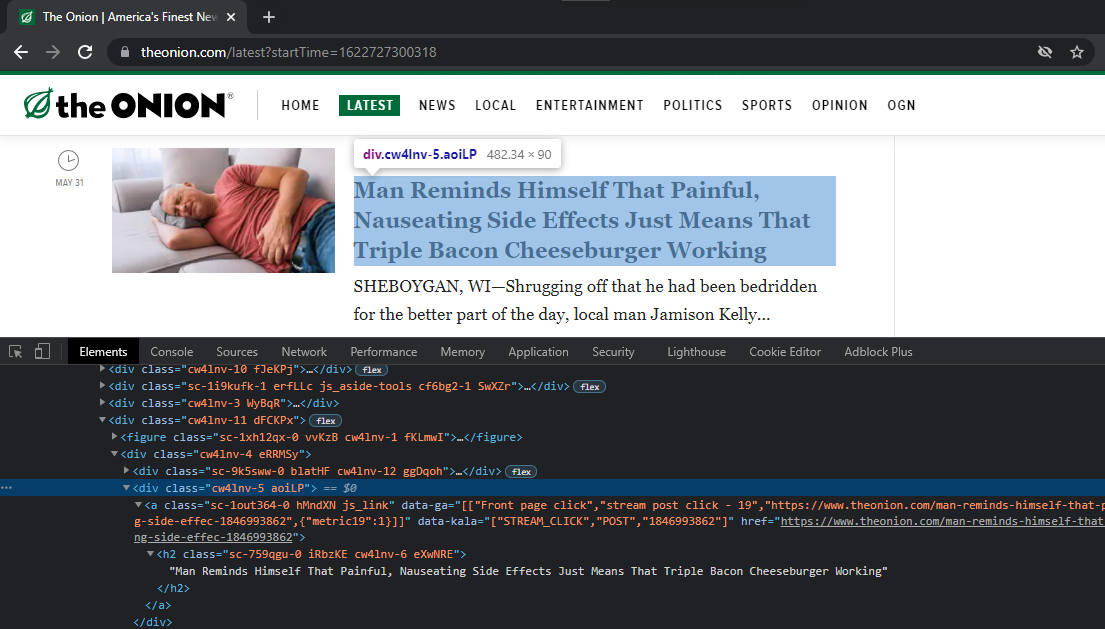


- Nhóm tiến hành viết code crawl dữ liệu từ trang https://www.theonion.com/latest

In [4]:
# Thêm thư viện cần thiết
import requests
from bs4 import BeautifulSoup
import datetime
import time

# Hàm lấy thời gian ban đầu 
def getTimeTheOnion():
    return int(time.time() * 1000)

# Hàm lấy thời gian mới sau mỗi lần lặp 
def getNewTimeTheOnion(timeStamp):
    return (timeStamp - int(1e9))

# Hàm chuyển timeStamp sang định dạng ngày giờ để tiện việc quan sát log
def convertTime(timeStamp):
    formatTime = '%Y-%m-%d %H:%M:%S'
    return datetime.datetime.fromtimestamp(timeStamp / 1000).strftime(formatTime)

# Hàm tìm bài viết trong mỗi lần có thời gian mới
def getArticleFromPage(timeStamp):
    # Định dạng đường dẫn của trang
    urlPage = 'https://www.theonion.com/latest?startTime=' + str(timeStamp)
    # Header truyền vào requests.get để tránh việc trang web chặn request không định danh
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36'}
    # Gửi request lên trang web để lấy dữ liệu về
    response = requests.get(urlPage, headers = headers)
    # In ra console xem request có thành công hay không (200)
    print(response)
    # Dùng hàm BeautifulSoup của thư viện bs4 để lấy dữ liệu đã được lọc
    soupSite = BeautifulSoup(response.text, 'html.parser')
    # Dùng hàm find_all để tìm tất cả các thẻ <div> có class = cw4lnv-5 aoiLP
    soupArticle = soupSite.find_all("div", class_="cw4lnv-5 aoiLP")
    # Trả về giá trị là mảng các bài viết thô
    return soupArticle

# Hàm tìm tiêu đề và link trong bài viết thô
def getHeadlineDataFormArticle(soupArticle):
    result = []
    for x in soupArticle:
        # Lấy giá trị trong thẻ <h2>
        headline = x.find("h2").get_text()
        # Lấy giá trị href trong thẻ <a>
        article_link = x.find("a")['href']
        # Gán nhãn cho bài viết ở trang này
        is_sarcastic = '1'
        result.append([headline, article_link, is_sarcastic])
    return result

# Hàm xuất output ra file
def writeFile(headlineData):
    fileOutput = "theonion.com.txt"
    # Mở file với với chế độ append và encoding="utf-8" (Tránh việc bị lỗi kí tự)
    f = open(fileOutput, "a", encoding="utf-8")
    for i in headlineData:
        # Định dạng lại dòng dữ liệu in ra file (Dùng | để tránh lỗi dấu ' hay " trong tiêu đề)
        strOut = i[0] + "|" + i[1] + "|" + i[2] + "\n"
        f.writelines(strOut)
    f.close()

# Hàm để gọi lại các hàm con khi thu thập
def getDataFromPage(timeStamp):
    print("=>>>>> ",convertTime(timeStamp))
    soupArticle = getArticleFromPage(timeStamp)
    headlineData = getHeadlineDataFormArticle(soupArticle)
    writeFile(headlineData)
    print("Number of data: ",len(headlineData))
    print("\n")

# Hàm chính của chương trình
k = 5 #Thay số này để được nhiều dữ liệu (Nhóm làm mẫu 5 lần lặp)
timeNow = getTimeTheOnion()
while k:
    getDataFromPage(timeNow)
    timeNow = getNewTimeTheOnion(timeNow)
    k -= 1

=>>>>>  2021-06-06 14:21:39
<Response [200]>
Number of data:  18


=>>>>>  2021-05-26 00:34:59
<Response [200]>
Number of data:  19


=>>>>>  2021-05-14 10:48:19
<Response [200]>
Number of data:  18


=>>>>>  2021-05-02 21:01:39
<Response [200]>
Number of data:  18


=>>>>>  2021-04-21 07:14:59
<Response [200]>
Number of data:  19




- Nhóm kiểm tra lại dữ liệu xem có đạt hay không

In [5]:
# Thêm thư viện cần thiết
import pandas as pd
# Đọc file csv bằng thư viện pandas
pd.read_csv("theonion.com.txt", delimiter="|", names=['headline', 'article_link', 'is_sarcastic'])

,headline,article_link,is_sarcastic
0,Conclusive Series Of Diagnostic Tests Determin...,https://www.theonion.com/conclusive-series-of-...,1
1,Celebrity Designers Describe Their Home Declut...,https://www.theonion.com/celebrity-designers-d...,1
2,Texas Valedictorian Goes Off-Script To Condemn...,https://www.theonion.com/texas-valedictorian-g...,1
3,Kyrsten Sinema Defends Senate Filibuster As Ne...,https://www.theonion.com/kyrsten-sinema-defend...,1
4,All The Biggest Changes To ‘Final Fantasy VII ...,https://www.theonion.com/all-the-biggest-chang...,1
...,...,...,...
271,Celebrity Chefs Explain Their Favorite Cooking...,https://www.theonion.com/celebrity-chefs-expla...,1
272,Woman Reassures Boyfriend That Just Because Sh...,https://www.theonion.com/woman-reassures-boyfr...,1
273,Rainforest Tree Remains Very Still In Hopes Th...,https://www.theonion.com/rainforest-tree-remai...,1
274,FTC Rules Businesses Must Disclose Whether The...,https://www.theonion.com/ftc-rules-businesses-...,1


##### **4.2.1.3 Script nhỏ để dễ đồng bộ với các thành viên nhóm**

- Trước khi nhóm tiến hành thu thập dữ liệu từ các trang khác, nhóm tiến hành viết 1 script nhỏ để gộp các dữ liệu thu thập được từ các thành viên trong nhóm dễ hơn, tránh bị trùng lặp và kiểm tra nhanh dữ liệu:
  + Đường dẫn của script: https://sv2.hungphu.tk/CS114/
  + Đường dẫn kiểm tra nhanh dữ liệu: https://sv2.hungphu.tk/CS114/data.php
  + Đường dẫn trả về file CSV: https://sv2.hungphu.tk/CS114/export.php

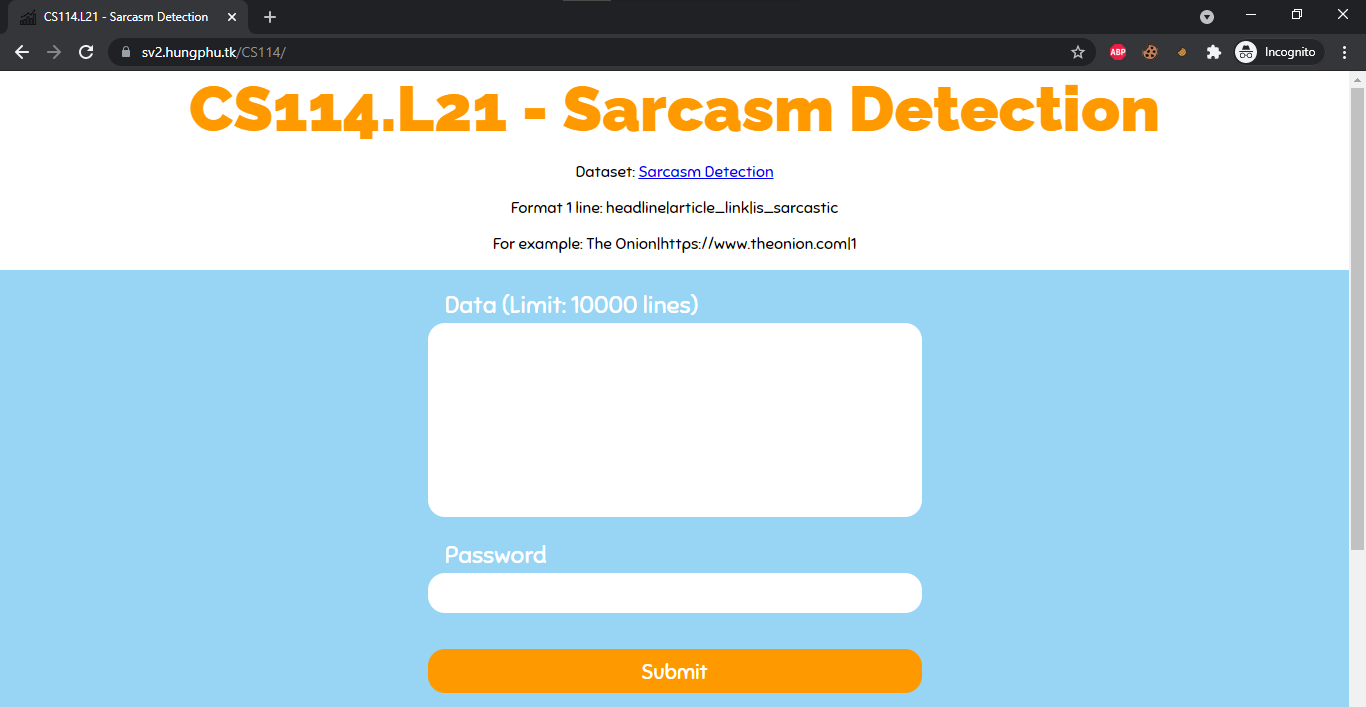

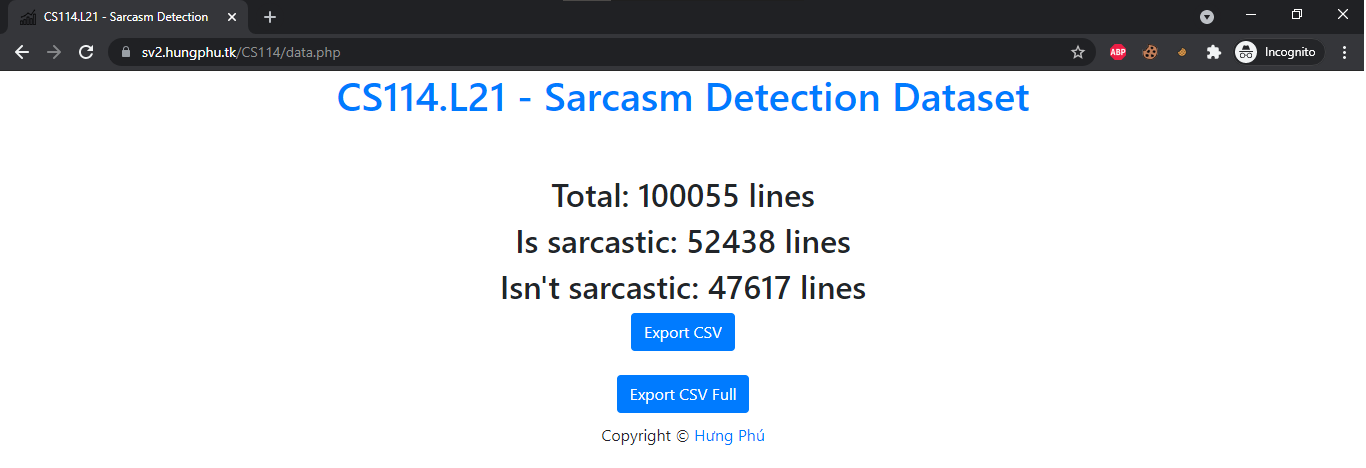

##### **4.2.1.4 Craw dữ liệu từ các trang web còn lại**
- Hầu như các trang còn lại đều có cấu trúc gần giống như trang web mẫu nên nhóm để source code lên github của nhóm (Mục 3)
- Có trang web https://www.nytimes.com/ khác với những trang còn lại là có cấp cho API miễn phí để lấy bài viết, nhóm tiến hành tạo API_KEY và crawl dữ liệu

- Nhóm thử crawl trang web https://www.nytimes.com/ bằng API mà https://www.nytimes.com/ cung cấp

In [6]:
# Thêm vào thư viện cần thiết
import requests
from bs4 import BeautifulSoup
import datetime
import time
import json

# Lấy mảng bài viết từ trang web
def getArticleFromPage(month, year):
    # API key được tạo từ trang https://www.nytimes.com/
    API_KEY = 'VgAeXa43ETi5AMY6B8fbSWiIdw4cxEop'
    API_url = "https://api.nytimes.com/svc/archive/v1/{}/{}.json?api-key={}".format(str(year), str(month), API_KEY)
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36'}
    response = requests.get(API_url, headers = headers)
    # Trả về mảng các bài từ json API trả về
    return response.json()['response']['docs']

# Các hàm còn lại gần giống với các hàm ở code crawl mẫu
def getHeadlineDataFormArticle(soupArticle):
    result = []
    for x in soupArticle:
        headline = x['headline']['main']
        article_link = x['web_url']
        is_sarcastic = '0'
        result.append([headline, article_link, is_sarcastic])
    return result

def writeFile(headlineData):
    fileOutput = "nytimes.com.txt"
    f = open(fileOutput, "a", encoding="utf-8")
    for i in headlineData:
        strOut = i[0] + "|" + i[1] + "|" + i[2] + "\n"
        f.writelines(strOut)
    f.close()
        
def getDataFromPage(month, year):
    print("=>>>>> {}/{}:".format(month, year)) 
    soupArticle = getArticleFromPage(month, year)
    headlineData = getHeadlineDataFormArticle(soupArticle)
    writeFile(headlineData)
    print("Number of data: ",len(headlineData))
    print("\n")

year = 2021
year_stop = 2021 # Năm cần crawl đến
while year > year_stop - 1:
    if year == 2021:
        month = 6
    else:
        month = 12
    while month:
        getDataFromPage(month, year)
        month -= 1
    year -= 1

=>>>>> 6/2021:
Number of data:  750


=>>>>> 5/2021:
Number of data:  4265


=>>>>> 4/2021:
Number of data:  4592


=>>>>> 3/2021:
Number of data:  4786


=>>>>> 2/2021:
Number of data:  4260


=>>>>> 1/2021:
Number of data:  7001




- Nhóm kiểm tra lại dữ liệu xem có đạt hay không

In [7]:
# Thêm thư viện cần thiết
import pandas as pd
# Đọc file csv bằng thư viện pandas
pd.read_csv("nytimes.com.txt", delimiter="|", names=['headline', 'article_link', 'is_sarcastic'])

,headline,article_link,is_sarcastic
0,"Glum to Gleeful, Israeli Media React to Possib...",https://www.nytimes.com/2021/05/31/world/middl...,0
1,Serena Williams Wins in the First Round at the...,https://www.nytimes.com/2021/05/31/sports/tenn...,0
2,Illinois Lawmakers Bar Police From Using Decep...,https://www.nytimes.com/2021/05/31/us/Chicago-...,0
3,With the Candlestick in the Study,https://www.nytimes.com/2021/05/31/crosswords/...,0
4,How Do Animals Safely Cross a Highway? Take a ...,https://www.nytimes.com/interactive/2021/05/31...,0
...,...,...,...
76957,Militants Storm Hotel in Somali Capital and Bl...,https://www.nytimes.com/2021/01/31/world/afric...,0
76958,"Not Yet Desperate, Japan and South Korea Plod ...",https://www.nytimes.com/2021/01/31/world/asia/...,0
76959,The Pop Star Wants to Be an Olympian,https://www.nytimes.com/2021/01/31/sports/olym...,0
76960,Your Monday Briefing,https://www.nytimes.com/2021/01/31/briefing/ru...,0


- Các trang web còn lại nhóm tải lên trang GitHub của nhóm (Mục 3)

#### **4.2.2. Đọc dữ liệu và phân tích dữ liệu**

- Đọc dữ liệu từ file CSV đã tổng hợp lại trên Github của nhóm

In [8]:
# Tải file CSV về từ Github
!curl -o Sarcasm_Detection.csv https://raw.githubusercontent.com/caohungphu/CS114.L21/main/Colab/CSV/Sarcasm_Detection/Sarcasm_Detection_Full.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.9M  100 14.9M    0     0  27.5M      0 --:--:-- --:--:-- --:--:-- 27.5M


- Kiểm tra sơ bộ dữ liệu

In [9]:
# Thêm thư viện cần thiết
import pandas as pd
import numpy as np
import warnings

# Tắt thông báo warning
warnings.filterwarnings("ignore")

# Đọc file CSV và kiểm tra thông tin của file
data = pd.read_csv("Sarcasm_Detection.csv")

# Xáo trộn các dòng trong csv và reset lại index
data = data.sample(frac=1).reset_index(drop=True)

#Kiểm tra lại file dữ liệu có giá trị null hay không
print(data.isnull().sum())
data

headline        1
article_link    0
is_sarcastic    0
dtype: int64


,headline,article_link,is_sarcastic
0,"Landmark Discovery: An Exhaustive, Decades-Lon...",https://clickhole.com/landmark-discovery-an-ex...,1
1,Koreans react to sixth nuclear test,https://www.euronews.com/2017/09/03/koreans-re...,0
2,Madrid police searching for a missing Spanish ...,https://www.burrardstreetjournal.com/madrid-po...,1
3,The NRA are a bunch of fucking arseholes and e...,https://rochdaleherald.co.uk/2017/10/02/the-nr...,1
4,CRACKED OLYMPICS SPECTACULAR!,https://www.cracked.com/article_15178_cracked-...,1
...,...,...,...
100050,How are Lebanese protesters using art to expre...,https://www.euronews.com/2019/11/28/how-are-le...,0
100051,Iran swears in its tenth parliament,https://www.euronews.com/2016/05/28/iran-swear...,0
100052,Nigel Farage accuses Nigel Farage of ‘desperat...,https://newsthump.com/2014/06/13/nigel-farage-...,1
100053,A night behind bars,https://www.euronews.com/2017/08/17/a-night-be...,0


- Chỉ có một dòng có giá trị null, nhóm tiến hành xóa dòng đó ra khỏi data

In [10]:
# Xóa dòng có giá trị null ra khỏi dữ liệu
data = data.dropna(how = 'any')

# Kiểm tra lại dữ liệu
print(data.isnull().sum())
data

headline        0
article_link    0
is_sarcastic    0
dtype: int64


,headline,article_link,is_sarcastic
0,"Landmark Discovery: An Exhaustive, Decades-Lon...",https://clickhole.com/landmark-discovery-an-ex...,1
1,Koreans react to sixth nuclear test,https://www.euronews.com/2017/09/03/koreans-re...,0
2,Madrid police searching for a missing Spanish ...,https://www.burrardstreetjournal.com/madrid-po...,1
3,The NRA are a bunch of fucking arseholes and e...,https://rochdaleherald.co.uk/2017/10/02/the-nr...,1
4,CRACKED OLYMPICS SPECTACULAR!,https://www.cracked.com/article_15178_cracked-...,1
...,...,...,...
100050,How are Lebanese protesters using art to expre...,https://www.euronews.com/2019/11/28/how-are-le...,0
100051,Iran swears in its tenth parliament,https://www.euronews.com/2016/05/28/iran-swear...,0
100052,Nigel Farage accuses Nigel Farage of ‘desperat...,https://newsthump.com/2014/06/13/nigel-farage-...,1
100053,A night behind bars,https://www.euronews.com/2017/08/17/a-night-be...,0


- Phân tích dữ liệu

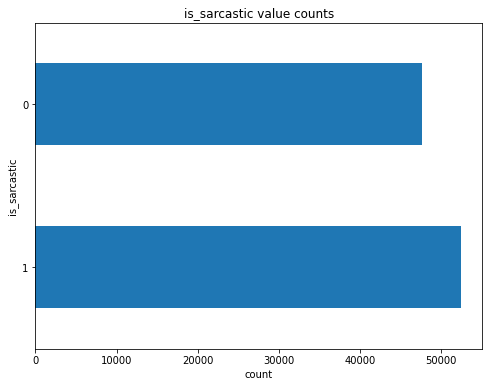

In [11]:
import matplotlib.pyplot as plt

# Hiển thị bằng plot giá trị is_sarcastic
data['is_sarcastic'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("is_sarcastic")
plt.title("is_sarcastic value counts");

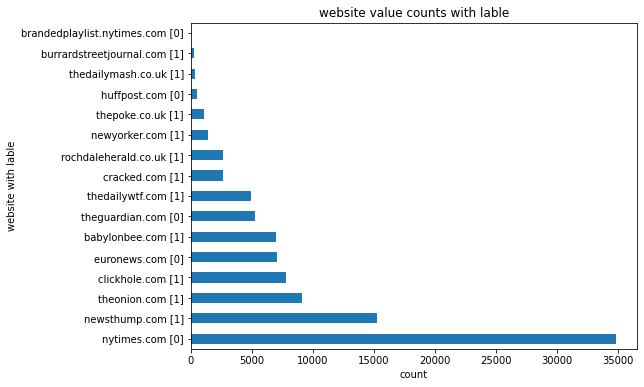

In [12]:
# Hàm lấy địa chỉ website từ article_link và is_sarcastic
def getWebsite(article_link, is_sarcastic):
    return article_link.split('/')[2].replace("www.", "") + " [" + str(is_sarcastic) + "]"

# Tạo một cột mới chứa địa chỉ website
data['website'] = data.apply(lambda x: getWebsite(x['article_link'], x['is_sarcastic']), axis=1)

# Hiển thị bằng plot giá trị website
data['website'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("website with lable")
plt.title("website value counts with lable");

#### **4.2.3. Tiền xử lí dữ liệu**

In [13]:
# Thêm thư viện re
import re

# Lấy 2 cột cần thiết là headline và is_sarcastic
new_data = data.copy()
new_data = new_data[['headline', 'is_sarcastic']]

# Hàm convert chuỗi
def convertString(x):
    # Chuyển sang kí tự chữ thường
    x = x.lower()
    # Loại bỏ các kí tự khác 0 - 9, a - z và khoảng cách
    x = re.sub("[^0-9a-z ]", '', x)
    return x

# Convert cột headline bằng hàm convertString và kiểm tra lại bảng
new_data['headline'] = new_data['headline'].apply(convertString)
new_data

,headline,is_sarcastic
0,landmark discovery an exhaustive decadeslong s...,1
1,koreans react to sixth nuclear test,0
2,madrid police searching for a missing spanish ...,1
3,the nra are a bunch of fucking arseholes and e...,1
4,cracked olympics spectacular,1
...,...,...
100050,how are lebanese protesters using art to expre...,0
100051,iran swears in its tenth parliament,0
100052,nigel farage accuses nigel farage of desperate...,1
100053,a night behind bars,0


#### **4.2.4. Thử nghiệm bằng Naive Bayes**

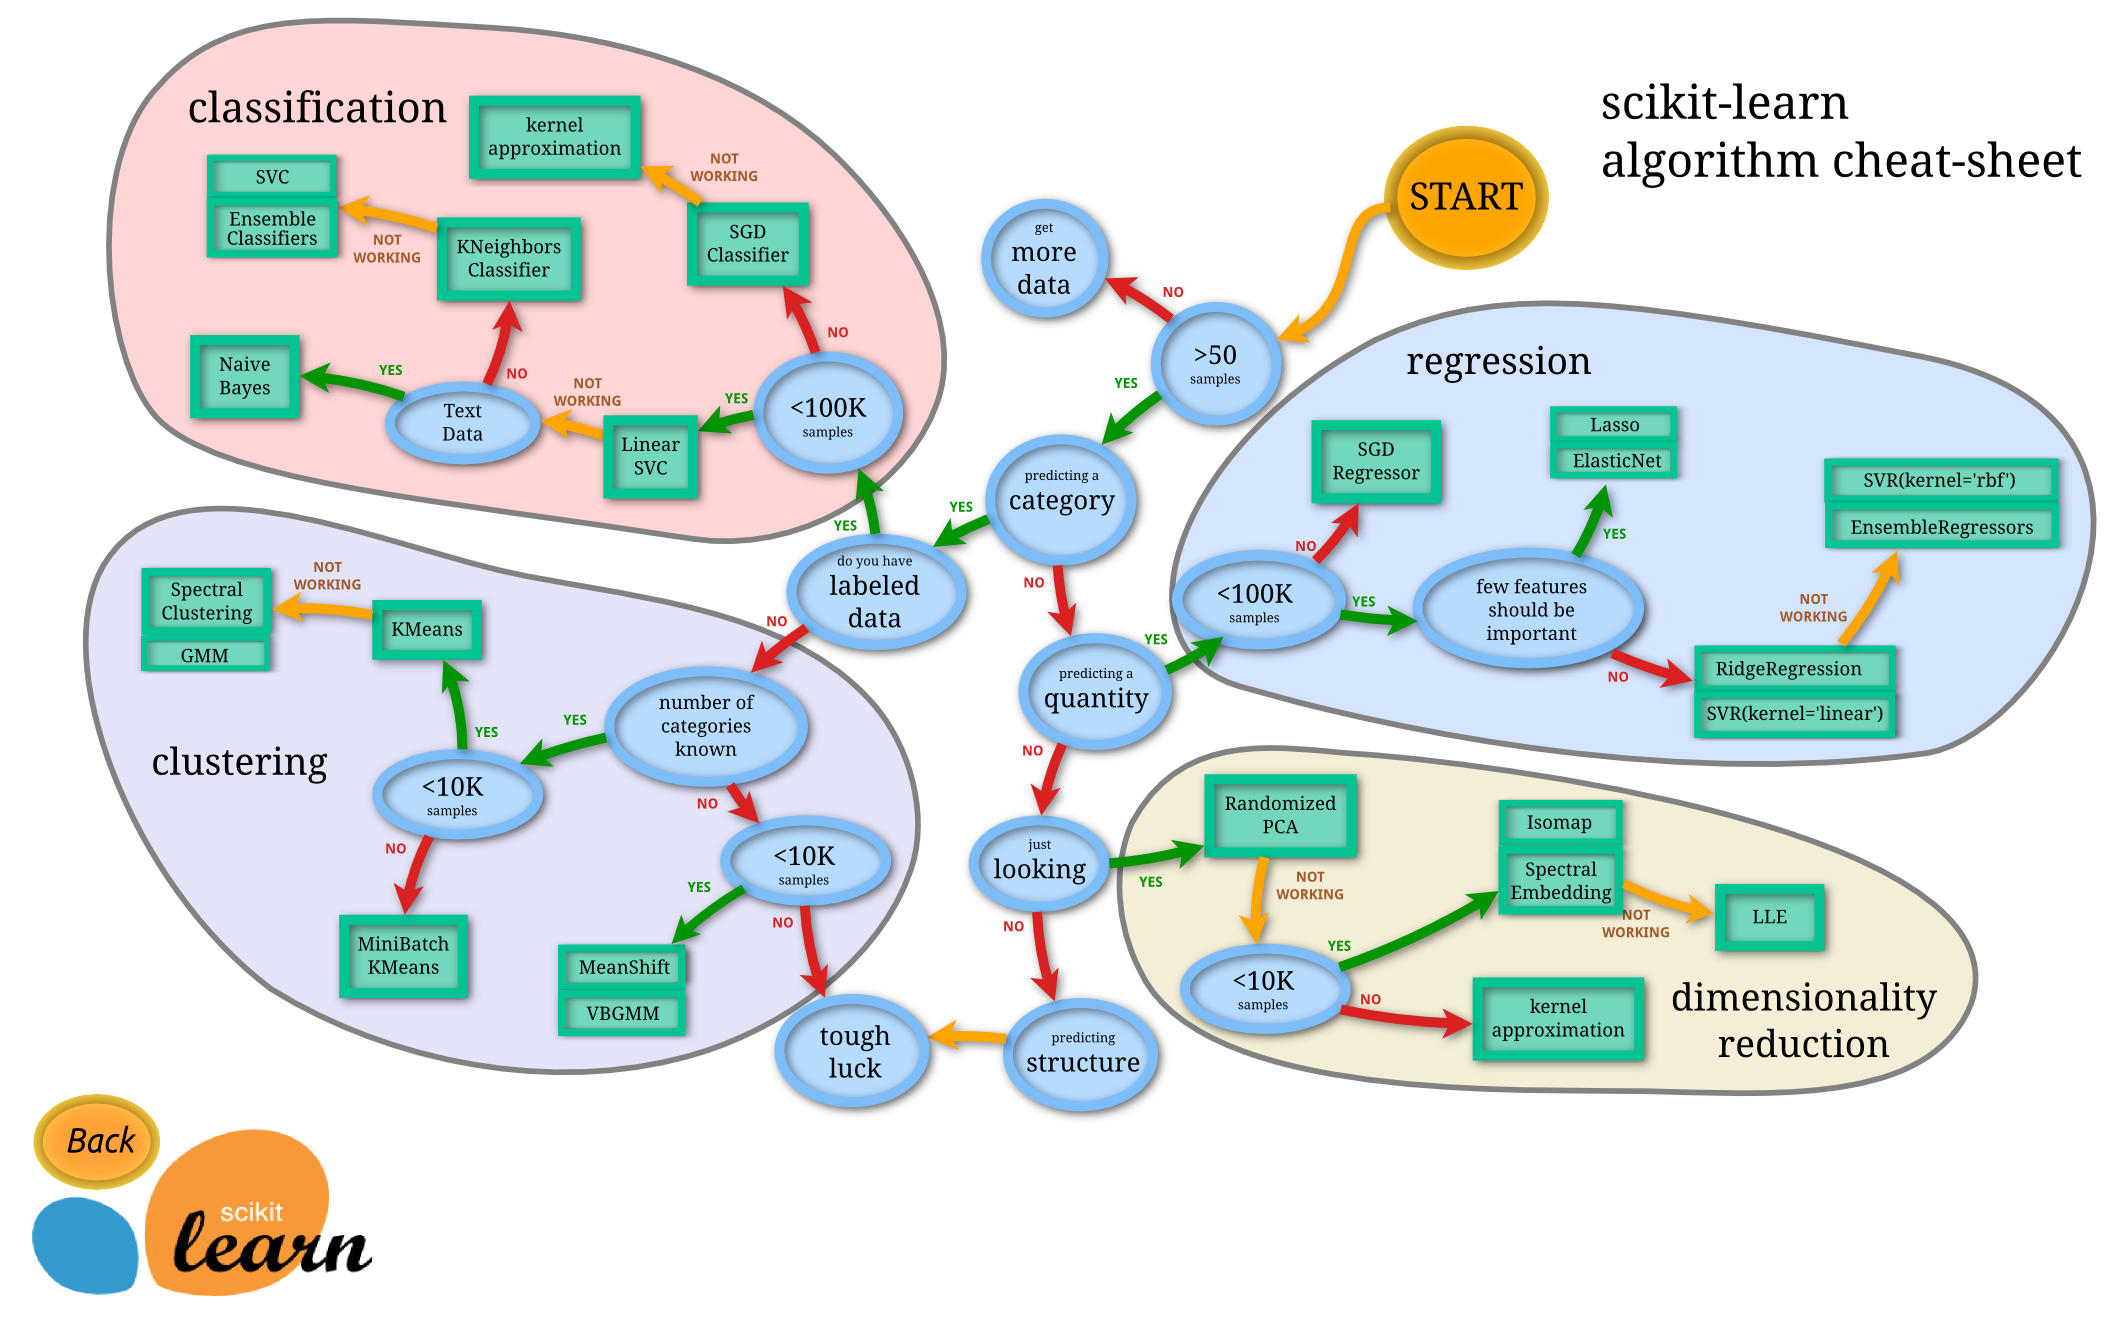

- Sau khi tham khảo "Machine Learning, NLP: Text Classification using scikit-learn, python and NLTK." (Mục 4.1.7) và "Choosing the right estimator" (Mục 4.1.8) nhóm tiến hành thử nghiệm bằng Naive Bayes và SGDClassifier

- Code nhóm tham khảo từ: [Naive Bayes Classifier for Text Classification](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) (Mục 4.1.9)


In [80]:
# Thêm thư viện cần thiết
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier

In [81]:
# Phân chia tập train và tập test
X = new_data['headline']
y = new_data['is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print("Train: ", len(X_train))
print("Test: ", len(X_test))

Train:  80043
Test:  20011


In [83]:
# Phân loại bằng MultinomialNB()

# Tạo pipeline
clf_NB = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Fit model
clf_NB.fit(X_train, y_train)

# Predict test
y_predict = clf_NB.predict(X_test)

# In bảng kết quả
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      9620
           1       0.83      0.89      0.86     10391

    accuracy                           0.85     20011
   macro avg       0.85      0.85      0.85     20011
weighted avg       0.85      0.85      0.85     20011



In [100]:
# Phân loại bằng MultinomialNB()

# Tạo pipeline
clf_SGD = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier()),
])

# Fit model
clf_SGD.fit(X_train, y_train)

# Predict test
y_predict = clf_SGD.predict(X_test)

# In bảng kết quả
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      9620
           1       0.82      0.90      0.86     10391

    accuracy                           0.84     20011
   macro avg       0.85      0.84      0.84     20011
weighted avg       0.85      0.84      0.84     20011



### **5.1. Nhận xét**


### **5.2. Trả lời yêu cầu đề bài**
